<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/023__Multiple_plots_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 2/6: EXPLORATORY DATA VISUALIZATION

# MISSION 2: Multiple plots

*Learn how matplotlib represents plots to work with multiple plots.*

In this mission, we will learn about the important matplotlib building blocks and used them to experiment with creating multiple line charts. 


## 1. Recap


In the previous mission, we explored how a visual representation of data can help us reach observations about data more quickly than a table representation of the same data. We learned how to work with the pyplot module, which provides a high-level interface to the matplotlib library, to create and customize a line chart of unemployment data. To look for potential seasonality, we started by creating a line chart of unemployment rates from 1948.

In this mission, we'll dive a bit deeper into matplotlib to learn how to create multiple line charts to help us compare monthly unemployment trends across time. 

### Introduction to the Data

![BLS logo](https://www.nccaom.org/wp-content/uploads/2016/12/BLS-Timeline-Main.jpg)

Just like in the last mission, we will use a specific type of data visualization to understand U.S. unemployment data. The United States [Bureau of Labor Statistics (BLS)](https://www.bls.gov/) surveys and calculates the monthly unemployment rate. The unemployment rate is the percentage of individuals in the labor force without a job. To find more information about how the BLS calculates the unemployment rate click [here](http://www.bls.gov/cps/cps_htgm.htm).

The BLS releases monthly unemployment data available for download as an Excel file, with the `.xlsx` file extension. While the pandas library can read in XLSX files, it relies on an external library for actually parsing the format. Let's instead download the same dataset as a CSV file [here](https://drive.google.com/file/d/1ccblpyB_BGKKtkAL8XbwOpJWtEBqdn8p/view?usp=sharing) or [here](https://github.com/Rossel/DataQuest_Courses/blob/master/datasets/unrate.csv). 

The dataset contains the monthly unemployment rate as a CSV from January 1948 to August 2016 and is saved as `unrate.csv`. Before we get into visual representations of data, let's first read this CSV file into pandas to explore the table representation of this data. The dataset we'll be working with is a [time series](https://en.wikipedia.org/wiki/Time_series) dataset, which means the data points (monthly unemployment rates) are ordered by time.

Let's start by importing the libraries we need and reading the dataset into pandas using Google Colab.

In [1]:
# Import functions from Google modules into Colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Insert file id from Google Drive shareable link:
# https://drive.google.com/file/d/1ccblpyB_BGKKtkAL8XbwOpJWtEBqdn8p/view?usp=sharing
id = "1ccblpyB_BGKKtkAL8XbwOpJWtEBqdn8p"

In [3]:
# Download the dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('unrate.csv')

In [4]:
# Import pandas library and read csv
import pandas as pd
unrate = pd.read_csv('unrate.csv')

In [5]:
# Convert the DATE column into a series of datetime values
unrate['DATE'] = pd.to_datetime(unrate['DATE'])

In [6]:
# Retrieve info on the unrate dataframe
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    824 non-null    datetime64[ns]
 1   VALUE   824 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


We can see here that the `DATE` column is of the `datetime64` Dtype.

In [7]:
# Print the first 12 rows
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


In [8]:
# Print dataframe dimensions
print(unrate.shape)

(824, 2)


## Recap from Last Mission
Let's practice what you learned in the previous mission:

In [10]:
# Import the matplotlib library
import matplotlib as mpl
import matplotlib.pyplot as plt

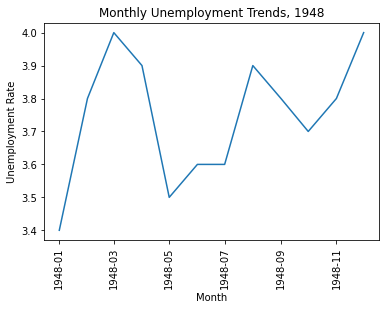

In [13]:
# Assign the first 12 rows to a variable 
first_twelve = unrate[:12]

# Generate a line chart that visualizes the unemployment rates from 1948
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation = 90)

# Set the x-axis label to "Month"
plt.xlabel('Month')

# Set the y-axis label to "Unemployment Rate"
plt.ylabel('Unemployment Rate')

# Set the plot title to "Monthly Unemployment Trends, 1948"
plt.title('Monthly Unemployment Trends, 1948')

# Display the plot
plt.show()

## 2. Matplotlib Classes

When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. 

When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. 

Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

- a container for all plots was created (returned as a [Figure object](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure))
- a container for the plot was positioned on a grid (the plot returned as an [Axes object](http://matplotlib.org/api/axes_api.html#matplotlib-axes))
- visual symbols were added to the plot (using the Axes methods)

A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

We can manually create a figure by calling [pyplot.figure()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure):


```
fig = plt.figure()
```




Instead of only calling the pyplot function, we assigned its return value to a variable (`fig`). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:

- values on the x-axis and y-axis
- ticks on the x-axis and y-axis
- all visual symbols, such as:
  - markers
  - lines
  - gridlines

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use [Figure.add_subplot](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot). This will return a new Axes object, which needs to be assigned to a variable:
```
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```
If we want the figure to contain 2 plots, one above the other, we need to write:
```
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
```
This will create a grid, 2 rows by 1 column, of plots.





## 3. Matplotlib Classes

Let's create a figure, add subplots to it, and display it.

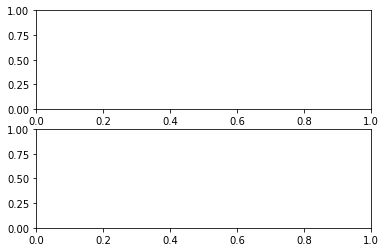

In [14]:
# Create a figure and assign to fig
fig = plt.figure()

# Create two subplots above and below each other
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# Display the resulting plot 
plt.show()

## 4. Grid Positioning

For each subplot, matplotlib generated a coordinate grid that was similar to the one we generated in the last mission using the `plot()` function:

- the x-axis and y-axis values ranging from 0.0 to 1.0
- no gridlines
- no data

The main difference is that this plot ranged from `0.0` to `1.0` instead of from `-0.06` to `0.06`, which is a quirk suggested by a difference in default properties.

Now that we have a basic understanding of the important matplotlib classes, we can create multiple plots to compare monthly unemployment trends. If you recall, we need to specify the position of each subplot on a grid. Here's a diagram that demonstrates how a 2 by 2 subplot layout would look like:

![alt text](https://s3.amazonaws.com/dq-content/multiple_subplots.png)

When the first subplot is created, matplotlib knows to create a grid with 2 rows and 2 columns. As we add each subplot, we specify the plot number we want returned and the corresponding Axes object is created and returned. In matplotlib, the plot number starts at the top left position in the grid (left-most plot on the top row), moves through the remaining positions in that row, then jumps to the left-most plot in the second row, and so forth.
![alt text](https://s3.amazonaws.com/dq-content/subplot_grid.png)

If we created a grid of 4 subplots but don't create a subplot for each position in the grid, areas without axes are left blank:
![alt text](https://s3.amazonaws.com/dq-content/multiple_subplots_missing_one_plot.png)

## 5. Adding Data

To generate a line chart within an Axes object, we need to call Axes.plot() and pass in the data you want plotted:
```
x_values = [0.0, 0.5, 1.0]
y_values = [10, 20, 40]
ax1.plot(x_values, y_values)
```
Like `pyplot.plot()`, the `Axes.plot()` will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects. It will also generate a line chart by default from the values passed in. Each time we want to generate a line chart, we need to call `Axes.plot()` and pass in the data we want to use in that plot.

Instructions:

Create 2 line subplots in a 2 row by 1 column layout:

- In the top subplot, plot the data from 1948.
  - For the x-axis, use the first 12 values in the `DATE` column.
  - For the y-axis, use the first 12 values in the `VALUE` column.
- In the bottom subplot, plot the data from 1949.
  - For the x-axis, use the values from index 12 to 23 in the `DATE` column.
  - For the y-axis, use the values from index 12 to 23 in the `VALUE` column.
Use `plt.show()` to display all the plots.

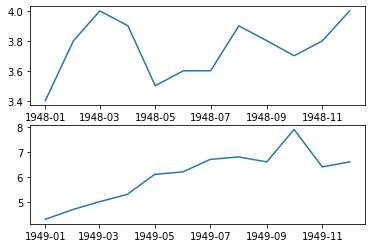

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])

ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])

plt.show()

## 6. Formatting And Spacing

## 7. Comparing Across More Years

## 8. Overlaying Line Charts

## 9. Adding More Lines

## 10. Adding A Legend

## 11. Final Tweaks



---



In the next mission, we'll explore plots that allow us to visualize discrete data.

